<a href="https://colab.research.google.com/github/Abie-UTB/Draining-a-Water-Tank-using-Numerical-Solution---A-Comparative-Study/blob/main/OneStep_vs_MultiStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

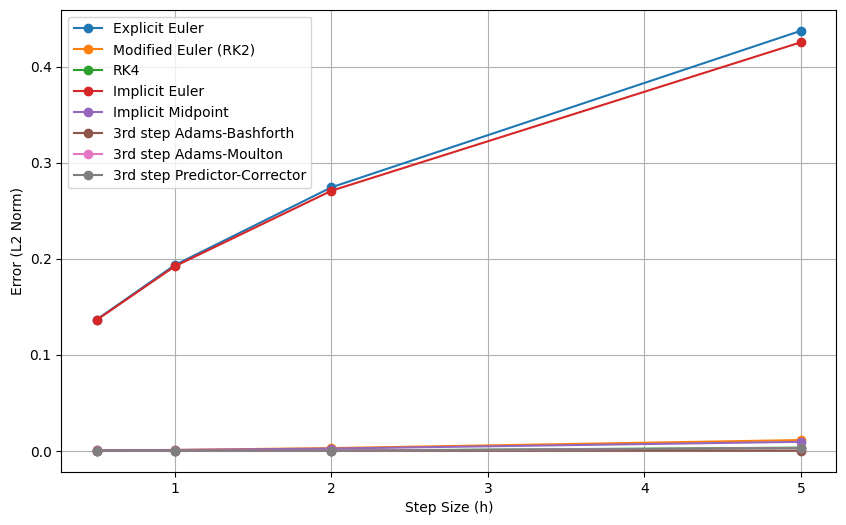

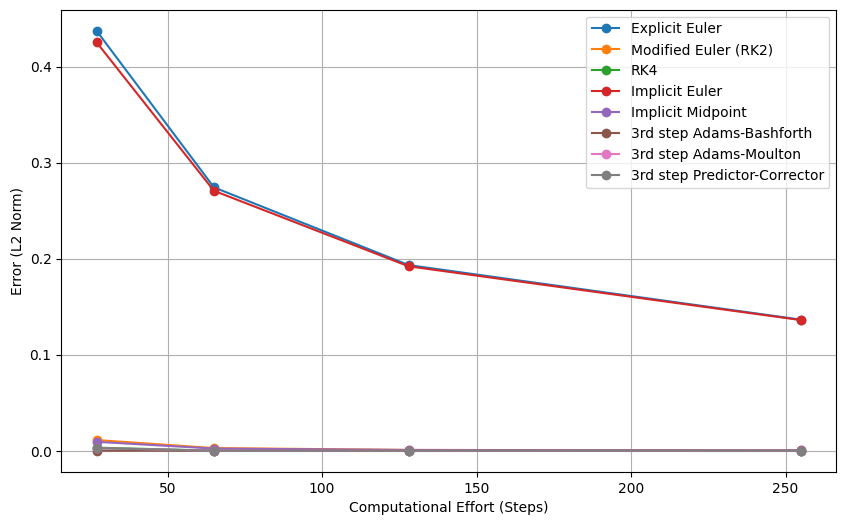

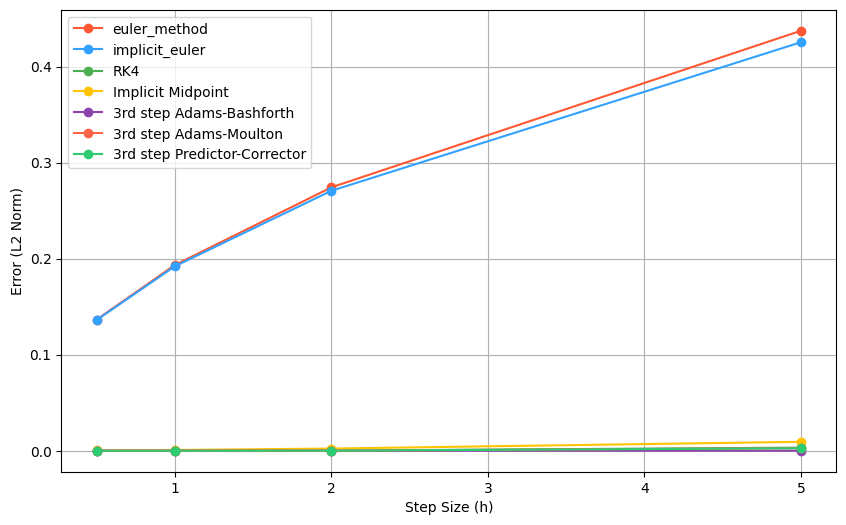

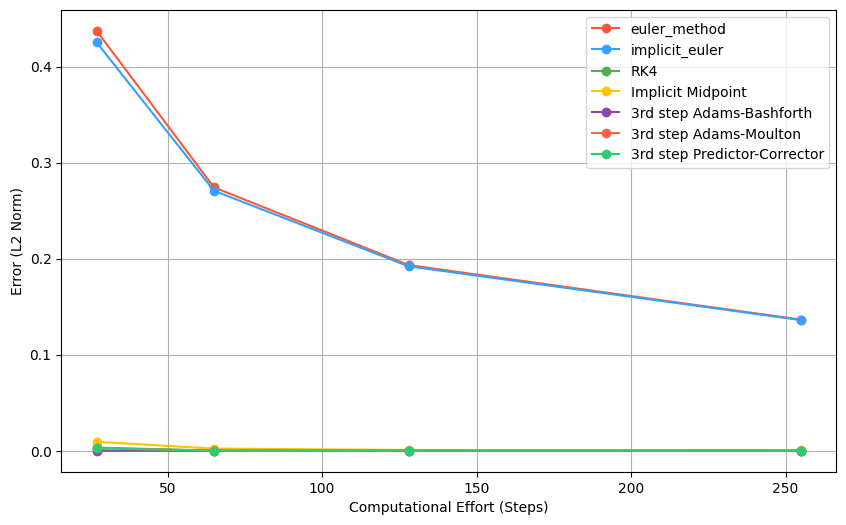

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravitational acceleration
D = 2     # Diameter of the cylinder
d = 0.2   # Diameter of the small hole at the bottom of the cylinder
tend = 127  # End time
initial_level = 8  # Initial water level in the tank

# Function to be solved (Torricelli's law)
def y_dot(t, y):
    return -np.sqrt(2 * g) * (d / D)**2 * np.sqrt(max(y, 0))  # Ensure non-negative y

# Exact solution for comparison
def exact_solution(t):
    return np.maximum((initial_level**0.5 - 0.5 * np.sqrt(2 * g) * (d / D)**2 * t)**2, 0)

# Numerical Methods
def euler_method(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1] + h * f(t[i], y[-1])
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

def runge_kutta_2(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        k1 = f(t[i], y[-1])
        k2 = f(t[i] + h / 2, y[-1] + h / 2 * k1)
        y_next = y[-1] + h * k2
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

def runge_kutta_4(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        k1 = f(t[i], y[-1])
        k2 = f(t[i] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[i] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[i] + h, y[-1] + h * k3)
        y_next = y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

def implicit_euler(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration
            y_next = y[-1] + h * f(t[i + 1], y_next)
            y_next = max(y_next, 0)  # Ensure non-negative y
        y.append(y_next)
    return np.array(y)

def implicit_midpoint(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration
            midpoint_time = (t[i] + t[i + 1]) / 2
            y_midpoint = (y[-1] + y_next) / 2
            y_next = y[-1] + h * f(midpoint_time, y_midpoint)
            y_next = max(y_next, 0)  # Ensure non-negative y
        y.append(y_next)
    return np.array(y)

def adams_bashforth_3(f, y0, t, h):
    y = [y0]
    for _ in range(2):
        k1 = f(t[0], y[-1])
        k2 = f(t[0] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[0] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[0] + h, y[-1] + h * k3)
        y.append(y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
    for i in range(2, len(t) - 1):
        f1 = f(t[i], y[-1])
        f2 = f(t[i - 1], y[-2])
        f3 = f(t[i - 2], y[-3])
        y_next = y[-1] + h * (23 * f1 - 16 * f2 + 5 * f3) / 12
        y.append(max(y_next, 0))
    return np.array(y)

def adams_moulton_3(f, y0, t, h):
    y = [y0]
    for _ in range(2):
        k1 = f(t[0], y[-1])
        k2 = f(t[0] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[0] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[0] + h, y[-1] + h * k3)
        y.append(y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
    for i in range(2, len(t) - 1):
        y_next = y[-1]
        for _ in range(10):
            f1 = f(t[i + 1], y_next)
            f2 = f(t[i], y[-1])
            f3 = f(t[i - 1], y[-2])
            y_next = y[-1] + h * (5 * f1 + 8 * f2 - f3) / 12
        y.append(max(y_next, 0))
    return np.array(y)

def predictor_corrector(f, y0, t, h):
    y = [y0]
    for _ in range(2):
        k1 = f(t[0], y[-1])
        k2 = f(t[0] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[0] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[0] + h, y[-1] + h * k3)
        y.append(y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
    for i in range(2, len(t) - 1):
        f1 = f(t[i], y[-1])
        f2 = f(t[i - 1], y[-2])
        f3 = f(t[i - 2], y[-3])
        y_pred = y[-1] + h * (23 * f1 - 16 * f2 + 5 * f3) / 12
        for _ in range(10):
            f1 = f(t[i + 1], y_pred)
            f2 = f(t[i], y[-1])
            f3 = f(t[i - 1], y[-2])
            y_pred = y[-1] + h * (5 * f1 + 8 * f2 - f3) / 12
        y.append(max(y_pred, 0))
    return np.array(y)

# Step sizes and methods
step_sizes = [0.5, 1.0, 2.0, 5.0]
methods = {
    "Explicit Euler": euler_method,
    "Modified Euler (RK2)": runge_kutta_2,
    "RK4": runge_kutta_4,
    "Implicit Euler": implicit_euler,
    "Implicit Midpoint": implicit_midpoint,
    "3rd step Adams-Bashforth": adams_bashforth_3,
    "3rd step Adams-Moulton": adams_moulton_3,
    "3rd step Predictor-Corrector": predictor_corrector
}
# Custom colors
colors = {
    "Explicit Euler": "#1f77b4",  # Blue
    "Modified Euler (RK2)": "#ff7f0e",  # Orange
    "RK4": "#2ca02c",  # Green
    "Implicit Euler": "#d62728",  # Red
    "Implicit Midpoint": "#9467bd",  # Purple
    "3rd step Adams-Bashforth": "#8c564b",  # Brown
    "3rd step Adams-Moulton": "#e377c2",  # Pink
    "3rd step Predictor-Corrector": "#7f7f7f",  # Gray
}

errors = {method: [] for method in methods}
efforts = {method: [] for method in methods}

for h in step_sizes:
    t = np.arange(0, tend + h, h)
    exact = exact_solution(t)
    for method, func in methods.items():
        y_approx = func(y_dot, initial_level, t, h)
        error = np.linalg.norm(exact - y_approx, ord=2)
        errors[method].append(error)
        efforts[method].append(len(t))

# Plotting
plt.figure(figsize=(10, 6))
for method, error_values in errors.items():
    plt.plot(step_sizes, error_values, label=method, marker='o')
plt.xlabel("Step Size (h)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Step Size")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for method, effort_values in efforts.items():
    plt.plot(effort_values, [errors[method][i] for i in range(len(effort_values))], label=method,color=colors[method], marker='o')
plt.xlabel("Computational Effort (Steps)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Computational Effort")
plt.legend()
plt.grid()
plt.show()


# Custom colors
custom_colors = {
    "euler_method": "#FF5733",           # Bright orange-red
    "implicit_euler": "#33A1FF",         # Sky blue
    "RK4": "#4CAF50",                    # Green
    "Implicit Midpoint": "#FFC300",      # Bright yellow
    "3rd step Adams-Bashforth": "#8E44AD",  # Purple
    "3rd step Adams-Moulton": "#FF6347", # Tomato red
    "3rd step Predictor-Corrector": "#2ECC71"  # Emerald green
}

# Constants
g = 9.81  # Gravitational acceleration
D = 2     # Diameter of the cylinder
d = 0.2   # Diameter of the small hole at the bottom of the cylinder
tend = 127  # End time
initial_level = 8  # Initial water level in the tank

# Function to be solved (Torricelli's law)
def y_dot(t, y):
    return -np.sqrt(2 * g) * (d / D)**2 * np.sqrt(max(y, 0))  # Ensure non-negative y

# Exact solution for comparison
def exact_solution(t):
    return np.maximum((initial_level**0.5 - 0.5 * np.sqrt(2 * g) * (d / D)**2 * t)**2, 0)

# Define numerical methods (the implementations provided earlier remain unchanged)

# Step sizes and methods
step_sizes = [0.5, 1.0, 2.0, 5.0]
methods = {
    "euler_method": euler_method,
    "implicit_euler": implicit_euler,
    "RK4": runge_kutta_4,
    "Implicit Midpoint": implicit_midpoint,
    "3rd step Adams-Bashforth": adams_bashforth_3,
    "3rd step Adams-Moulton": adams_moulton_3,
    "3rd step Predictor-Corrector": predictor_corrector
}

errors = {method: [] for method in methods}
efforts = {method: [] for method in methods}

for h in step_sizes:
    t = np.arange(0, tend + h, h)
    exact = exact_solution(t)
    for method, func in methods.items():
        y_approx = func(y_dot, initial_level, t, h)
        error = np.linalg.norm(exact - y_approx, ord=2)
        errors[method].append(error)
        efforts[method].append(len(t))

# Plotting Error vs. Step Size
plt.figure(figsize=(10, 6))
for method, error_values in errors.items():
    plt.plot(
        step_sizes, error_values,
        label=method,
        marker='o',
        color=custom_colors.get(method, "#000000")  # Default to black if not in custom_colors
    )
plt.xlabel("Step Size (h)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Step Size")
plt.legend()
plt.grid()
plt.show()

# Plotting Error vs. Computational Effort
plt.figure(figsize=(10, 6))
for method, effort_values in efforts.items():
    plt.plot(
        effort_values,
        [errors[method][i] for i in range(len(effort_values))],
        label=method,
        marker='o',
        color=custom_colors.get(method, "#000000")  # Default to black if not in custom_colors
    )
plt.xlabel("Computational Effort (Steps)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Computational Effort")
plt.legend()
plt.grid()
plt.show()
